In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'Chicago_Crime_Detective.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
df.dtypes

Unnamed: 0              int64
ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [5]:
df.shape

(191641, 10)

In [6]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Date                       0
LocationDescription        0
Arrest                     0
Domestic                   0
Beat                       0
District               43052
CommunityArea          24603
Year                       0
dtype: int64

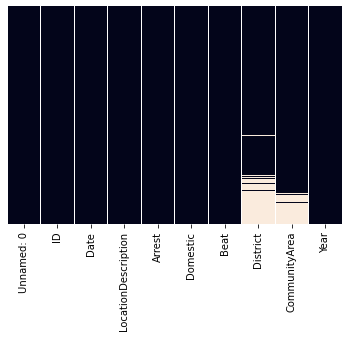

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df['Arrest']=df.Arrest.replace(True,1)

In [9]:
df['Arrest']=df.Arrest.replace(False,0)

In [10]:
df['Domestic']=df.Domestic.replace(True,1)

In [11]:
df['Domestic']=df.Domestic.replace(False,0)

In [12]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,0.0,0.0,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,0.0,0.0,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),0.0,0.0,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,0.0,0.0,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,0.0,0.0,211,2,35,2012


In [13]:
p = df.LocationDescription.unique()
for index,i in enumerate(p):
    print(index,i)

0 STREET
1 RESIDENTIAL YARD (FRONT/BACK)
2 GAS STATION
3 PARKING LOT/GARAGE(NON.RESID.)
4 VEHICLE NON-COMMERCIAL
5 CTA GARAGE / OTHER PROPERTY
6 RESIDENCE-GARAGE
7 OTHER
8 ALLEY
9 SPORTS ARENA/STADIUM
10 VACANT LOT/LAND
11 RESIDENCE
12 SCHOOL, PUBLIC, GROUNDS
13 DRIVEWAY - RESIDENTIAL
14 POLICE FACILITY/VEH PARKING LOT
15 SIDEWALK
16 APARTMENT
17 VEHICLE-COMMERCIAL
18 AIRPORT VENDING ESTABLISHMENT
19 BAR OR TAVERN
20 PARK PROPERTY
21 HIGHWAY/EXPRESSWAY
22 COLLEGE/UNIVERSITY GROUNDS
23 SMALL RETAIL STORE
24 CAR WASH
25 FACTORY/MANUFACTURING BUILDING
26 RESTAURANT
27 FIRE STATION
28 CHA PARKING LOT/GROUNDS
29 AIRPORT EXTERIOR - NON-SECURE AREA
30 CTA TRAIN
31 GROCERY FOOD STORE
32 AIRPORT PARKING LOT
33 MOVIE HOUSE/THEATER
34 TAVERN/LIQUOR STORE
35 GOVERNMENT BUILDING/PROPERTY
36 NURSING HOME/RETIREMENT HOME
37 AIRPORT/AIRCRAFT
38 HOTEL/MOTEL
39 CHURCH/SYNAGOGUE/PLACE OF WORSHIP
40 CONSTRUCTION SITE
41 COMMERCIAL / BUSINESS OFFICE
42 SCHOOL, PUBLIC, BUILDING
43 DEPARTMENT STORE
44 WAREHO

In [14]:
#to convert LocationDescription into integer
p = df.LocationDescription.unique()
for index,i in enumerate(p):
    df['LocationDescription']=df.LocationDescription.replace(i,index)

In [15]:
df.LocationDescription.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [16]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,0,0.0,0.0,623,6,69,2012
1,1,8951141,12/31/12 22:00,0,0.0,0.0,1213,12,24,2012
2,2,8952745,12/31/12 22:00,1,0.0,0.0,1622,16,11,2012
3,3,8952223,12/31/12 22:00,0,0.0,0.0,724,7,67,2012
4,4,8951608,12/31/12 21:30,0,0.0,0.0,211,2,35,2012


In [17]:
#to count the crime in LocationDescription area i.e., Gas Station, Street, etc
p = df.LocationDescription.value_counts()
p

0     156564
3      14852
7       4573
8       2308
2       2111
       ...  
57         1
76         1
73         1
47         1
75         1
Name: LocationDescription, Length: 78, dtype: int64

In [18]:
# to find the locations with maximum no. of crime
p.sort_values().tail(10)

10       985
6       1176
11      1302
1       1536
13      1675
2       2111
8       2308
7       4573
3      14852
0     156564
Name: LocationDescription, dtype: int64

In [19]:
# to find locations that are the top five locations for motor vehicle thefts, excluding the "Other" category
p.sort_values().tail(6).sum()-p[7]

177510

In [20]:
p[2],p[8]

(2111, 2308)

In [21]:
p.max()

156564

In [22]:
i=0
while i<78:
    if p[i]==2308:
        print(i)
    i=i+1

8


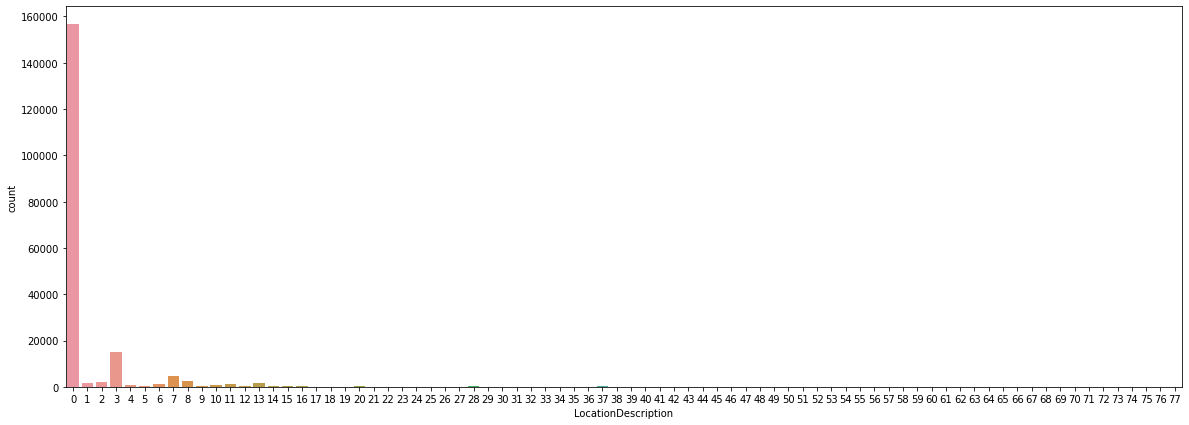

In [23]:
# to plot the graph for finding which location is responsible for maximum theft
# plotting for LocationDescription
l = df.LocationDescription
plt.figure(figsize=(20, 7))
sns.countplot(x=l)

In [24]:
# to find number of arrest
i=0
a=[]
b=[]
p = df.Arrest
for i in p:
    if i==1:
        a.append(i)
    else:
        b.append(i)

In [25]:
len(a)

15536

In [26]:
len(b)

176105

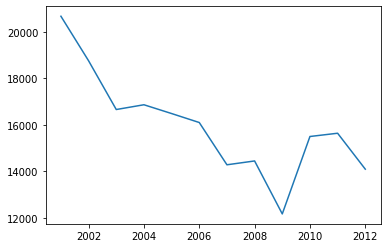

In [27]:
df['Year'].value_counts().sort_index().plot()

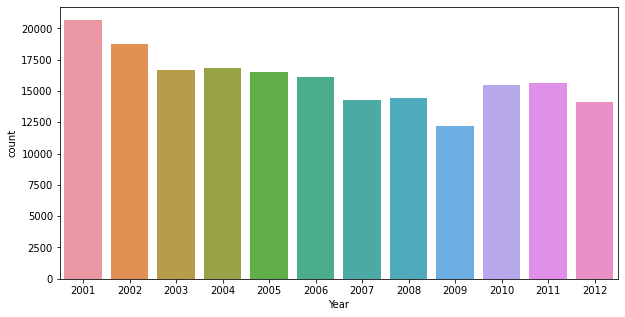

In [28]:
j=df.Year
plt.figure(figsize=(10,5))
sns.countplot(x=j)

In [29]:
# to know the crime committed per year
df['Year'].value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

In [30]:
df['Date'] = pd.to_datetime(df.Date)

In [31]:
df['Weekday'] = df['Date'].dt.day_name()

In [32]:
df['Month_name'] = df['Date'].dt.month_name()

In [33]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Weekday,Month_name
0,0,8951354,2012-12-31 23:15:00,0,0.0,0.0,623,6,69,2012,Monday,December
1,1,8951141,2012-12-31 22:00:00,0,0.0,0.0,1213,12,24,2012,Monday,December
2,2,8952745,2012-12-31 22:00:00,1,0.0,0.0,1622,16,11,2012,Monday,December
3,3,8952223,2012-12-31 22:00:00,0,0.0,0.0,724,7,67,2012,Monday,December
4,4,8951608,2012-12-31 21:30:00,0,0.0,0.0,211,2,35,2012,Monday,December


In [34]:
# to know the total number of crimes per weekday
df.Weekday.value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Weekday, dtype: int64

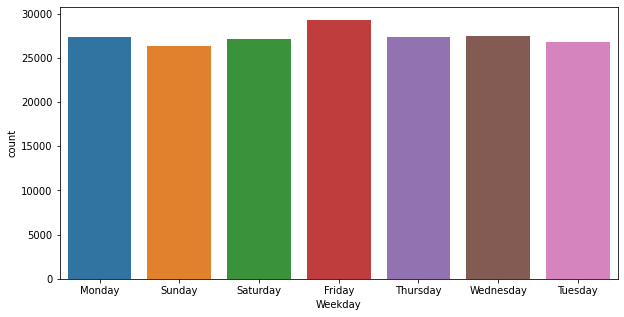

In [35]:
w = df.Weekday
plt.figure(figsize=(10,5))
sns.countplot(x=w)

In [36]:
# to know the total number of crimes per month
df.Month_name.value_counts()

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Month_name, dtype: int64

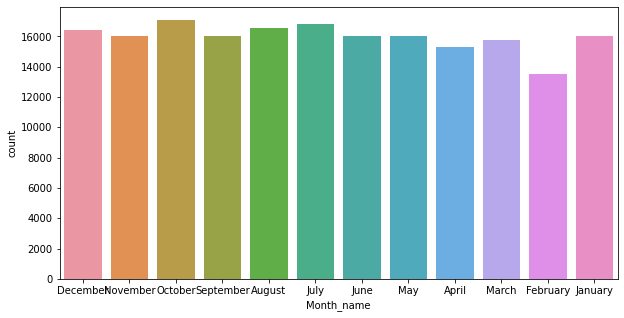

In [37]:
m = df.Month_name
plt.figure(figsize=(10,5))
sns.countplot(x=m)

In [38]:
# total Arrest made every year
df.groupby('Year')['Arrest'].sum()

Year
2001    2152.0
2002    2115.0
2003    1798.0
2004    1693.0
2005    1528.0
2006    1302.0
2007    1212.0
2008    1020.0
2009     840.0
2010     701.0
2011     625.0
2012     550.0
Name: Arrest, dtype: float64

In [39]:
p = df['Year'].value_counts()
u = df.groupby('Year')['Arrest'].sum()

In [40]:
# For what proportion of motor vehicle thefts in 2001 was an arrest made
l = p[2001]
v = u[2001]/l
v

0.10411727708161982

In [41]:
# For what proportion of motor vehicle thefts in 2007 was an arrest made
l = p[2007]
v = u[2007]/l
v

0.08487394957983194

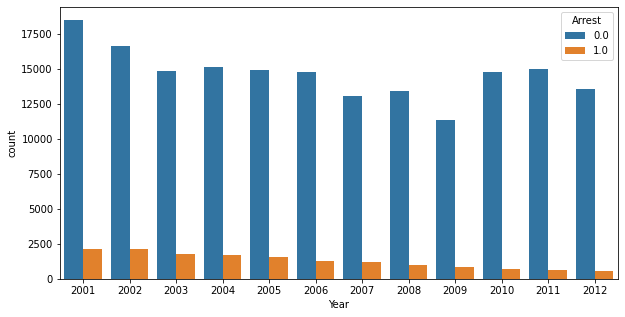

In [42]:
# Year wise arrest and no arrest distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Year', hue='Arrest', data=df)

In [43]:
#count of total arrest made each day
df.groupby('Weekday')['Arrest'].sum()

Weekday
Friday       2370.0
Monday       2176.0
Saturday     2255.0
Sunday       2330.0
Thursday     2087.0
Tuesday      2108.0
Wednesday    2210.0
Name: Arrest, dtype: float64

In [44]:
#No. of crimes committed every day
df['Weekday'].value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Weekday, dtype: int64

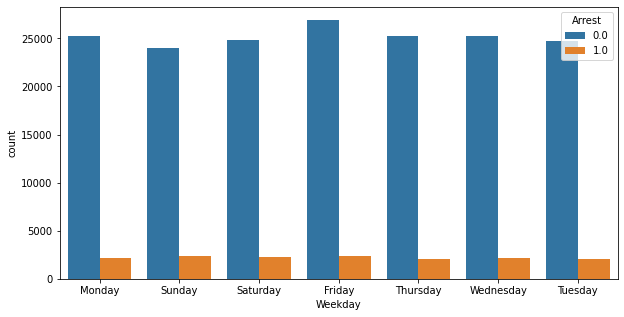

In [45]:
# Weekday wise arrest and no arrest distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Arrest', data=df)

In [46]:
#count of total arrest made every month
df.groupby('Month_name')['Arrest'].sum()

Month_name
April        1252.0
August       1329.0
December     1397.0
February     1238.0
January      1435.0
July         1324.0
June         1230.0
March        1298.0
May          1187.0
November     1256.0
October      1342.0
September    1248.0
Name: Arrest, dtype: float64

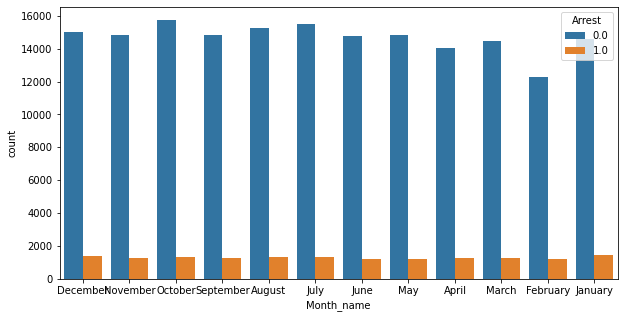

In [47]:
# Month wise arrest and no arrest distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Month_name', hue='Arrest', data=df)

In [48]:
#Total no. of arrest made on Beat
a=df.groupby('Beat')['Arrest'].sum()
a

Beat
111      33.0
112      18.0
113      12.0
114       0.0
121       1.0
        ...  
2531     65.0
2532     91.0
2533     80.0
2534    110.0
2535     94.0
Name: Arrest, Length: 300, dtype: float64

In [49]:
a[2535]

94.0

In [50]:
a[113]

12.0

In [51]:
#Sum of Arrest made on LocationDescription Segment
m = df.groupby('LocationDescription')['Arrest'].sum()

In [52]:
m

LocationDescription
0     11595.0
1        71.0
2       439.0
3      1603.0
4        59.0
       ...   
73        0.0
74        1.0
75        0.0
76        0.0
77        0.0
Name: Arrest, Length: 78, dtype: float64

In [53]:
m[4]

59.0

In [54]:
m[77]

0.0

In [55]:
df.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription             int64
Arrest                        float64
Domestic                      float64
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
Weekday                        object
Month_name                     object
dtype: object

In [56]:
df['CommunityArea'] = pd.to_numeric(df['CommunityArea'],errors='coerce')

In [57]:
df['District'] = pd.to_numeric(df['District'],errors='coerce')

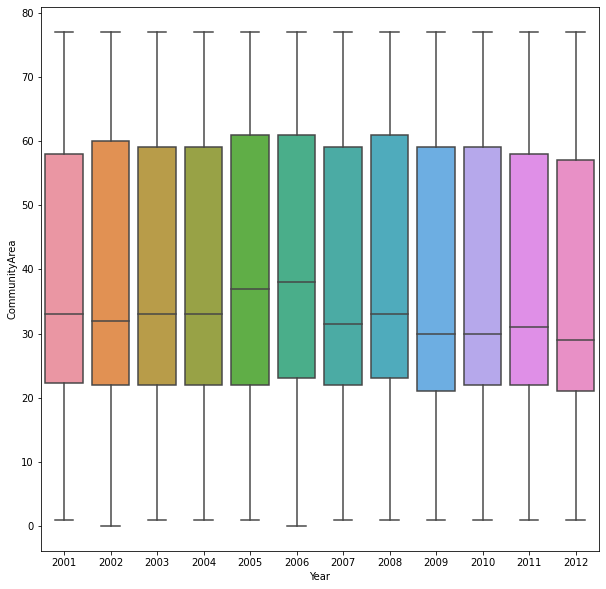

In [58]:
#to replace all the nan value in CommunityArea with mean values
plt.figure(figsize=(10,10))
sns.boxplot(y='CommunityArea',x='Year',data=df)

In [59]:
def com_area(cols):
    CommunityArea = cols[0]
    Year = cols[1]
    if pd.isnull(CommunityArea):
        if Year == 2001:
            return 34
        elif Year == 2002:
            return 33
        elif Year == 2003:
            return 34
        elif Year == 2004:
            return 34
        elif Year == 2005:
            return 37
        elif Year == 2006:
            return 38
        elif Year == 2007:
            return 32
        elif Year == 2008:
            return 34
        elif Year == 2009:
            return 30
        elif Year == 2010:
            return 31
        elif Year == 2011:
            return 29
        else:
            return 24
    else:
        return CommunityArea

In [60]:
df['CommunityArea'] = df[['CommunityArea', 'Year']].apply(com_area,axis=1)

In [61]:
g = df['CommunityArea']

In [62]:
g[1]

24.0

In [63]:
df[['CommunityArea', 'Year']]

,CommunityArea,Year
0,69.0,2012
1,24.0,2012
2,11.0,2012
3,67.0,2012
4,35.0,2012
...,...,...
191636,34.0,2001
191637,34.0,2001
191638,34.0,2001
191639,34.0,2001


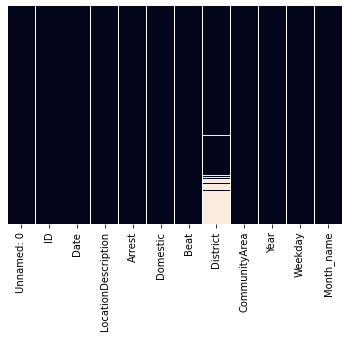

In [64]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [65]:
df.drop('District',axis=1,inplace=True)

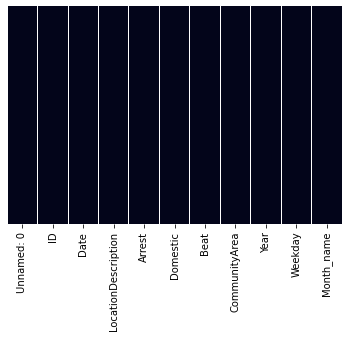

In [66]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [67]:
df.median()

Unnamed: 0               95820.0
ID                     4762956.0
LocationDescription          0.0
Arrest                       0.0
Domestic                     0.0
Beat                      1121.0
CommunityArea               34.0
Year                      2006.0
dtype: float64

In [68]:
df.Month_name[95820]

'May'

In [69]:
e = df.groupby('LocationDescription')['Weekday'].value_counts()

In [70]:
e

LocationDescription  Weekday  
0                    Friday       23773
                     Wednesday    22371
                     Monday       22305
                     Thursday     22296
                     Saturday     22175
                                  ...  
75                   Saturday         1
76                   Wednesday        1
77                   Monday           1
                     Thursday         1
                     Wednesday        1
Name: Weekday, Length: 413, dtype: int64

In [71]:
e[0]

Weekday
Friday       23773
Wednesday    22371
Monday       22305
Thursday     22296
Saturday     22175
Tuesday      21888
Sunday       21756
Name: Weekday, dtype: int64

In [72]:
e[75]

Weekday
Saturday    1
Name: Weekday, dtype: int64

In [73]:
e[2]

Weekday
Saturday     338
Sunday       336
Friday       332
Thursday     282
Monday       280
Wednesday    273
Tuesday      270
Name: Weekday, dtype: int64